As a part of this i will learn how to handle missing data,fillna and dropnaand interpolate

In [23]:
import pandas as pd
df=pd.read_excel("weather_data.xlsx",parse_dates=["day"])
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-02-01,NaN,9.0,Sunny
2,2017-03-01,28.0,NaN,Snow
3,2017-04-01,NaN,7.0,NaN
4,2017-05-01,32.0,NaN,NaN
5,2017-06-01,NaN,NaN,Sunny
6,2017-07-01,34.0,8.0,NaN
7,2017-08-01,40.0,12.0,Cloudy


In [24]:
df.head()

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-02-01,NaN,9.0,Sunny
2,2017-03-01,28.0,NaN,Snow
3,2017-04-01,NaN,7.0,NaN
4,2017-05-01,32.0,NaN,NaN


make day as date column

In [25]:
type(df.day[0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
# make this as an index, inplace true will modify the df
df.set_index('day',inplace=True)
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-01,NaN,9.0,Sunny
2017-03-01,28.0,NaN,Snow
2017-04-01,NaN,7.0,NaN
2017-05-01,32.0,NaN,NaN
2017-06-01,NaN,NaN,Sunny
2017-07-01,34.0,8.0,NaN
2017-08-01,40.0,12.0,Cloudy


In [27]:
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-01,NaN,9.0,Sunny
2017-03-01,28.0,NaN,Snow
2017-04-01,NaN,7.0,NaN
2017-05-01,32.0,NaN,NaN
2017-06-01,NaN,NaN,Sunny
2017-07-01,34.0,8.0,NaN
2017-08-01,40.0,12.0,Cloudy


Replace nan with some other value

In [28]:
df.event[3]

nan

In [ ]:
# df['column_name'].replace('None', np.nan, inplace=True)


In [18]:
new_df=df.fillna(0)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-01,0.0,9.0,Sunny
2017-03-01,28.0,0.0,Snow
2017-04-01,0.0,7.0,0
2017-05-01,32.0,0.0,0
2017-06-01,0.0,0.0,Sunny
2017-07-01,34.0,8.0,0
2017-08-01,40.0,12.0,Cloudy


In [19]:
# Trying to fill in specific column this value where i have nan
new_df=df.fillna({
    "temperature":0,
    "windspeed": 0,
    "event":"no event",
    
})
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-01,0.0,9.0,Sunny
2017-03-01,28.0,0.0,Snow
2017-04-01,0.0,7.0,no event
2017-05-01,32.0,0.0,no event
2017-06-01,0.0,0.0,Sunny
2017-07-01,34.0,8.0,no event
2017-08-01,40.0,12.0,Cloudy


In [20]:
new_df=df.fillna(method="ffill")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-01,32.0,9.0,Sunny
2017-03-01,28.0,9.0,Snow
2017-04-01,28.0,7.0,Snow
2017-05-01,32.0,7.0,Snow
2017-06-01,32.0,7.0,Sunny
2017-07-01,34.0,8.0,Sunny
2017-08-01,40.0,12.0,Cloudy


In [21]:
# copy next day values
new_df=df.fillna(method="bfill")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-01,28.0,9.0,Sunny
2017-03-01,28.0,7.0,Snow
2017-04-01,32.0,7.0,Sunny
2017-05-01,32.0,8.0,Sunny
2017-06-01,34.0,8.0,Sunny
2017-07-01,34.0,8.0,Cloudy
2017-08-01,40.0,12.0,Cloudy


In [22]:
# copying horizonatally or vertically
new_df=df.fillna(method="bfill",axis="columns")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-01,9.0,9.0,Sunny
2017-03-01,28.0,Snow,Snow
2017-04-01,7.0,7.0,NaN
2017-05-01,32.0,NaN,NaN
2017-06-01,Sunny,Sunny,Sunny
2017-07-01,34.0,8.0,NaN
2017-08-01,40.0,12.0,Cloudy


In [20]:
# carry forward only once
new_df=df.fillna(method="bfill",limit=1)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-02-01,None,9,Sunny
2017-03-01,28,None,Snow
2017-04-01,None,7,Nan
2017-05-01,32,None,None
2017-06-01,None,None,Sunny
2017-07-01,34,8,Nan
2017-08-01,40,12,Cloudy


In [21]:
# interpolate,by default linear
new_df=df.interpolate()
new_df

TypeError: Cannot interpolate with all object-dtype columns in the DataFrame. Try setting at least one column to a numeric dtype.

In [22]:
# drop all the na
new_df=df.dropna()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-02-01,None,9,Sunny
2017-03-01,28,None,Snow
2017-04-01,None,7,Nan
2017-05-01,32,None,None
2017-06-01,None,None,Sunny
2017-07-01,34,8,Nan
2017-08-01,40,12,Cloudy


In [29]:
# to preserve some nas
new_df=df.dropna(how="all")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-01,NaN,9.0,Sunny
2017-03-01,28.0,NaN,Snow
2017-04-01,NaN,7.0,NaN
2017-05-01,32.0,NaN,NaN
2017-06-01,NaN,NaN,Sunny
2017-07-01,34.0,8.0,NaN
2017-08-01,40.0,12.0,Cloudy


if i have atleast one none na value keep that and drop others 

In [24]:
new_df=df.dropna(thresh=2)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-02-01,None,9,Sunny
2017-03-01,28,None,Snow
2017-04-01,None,7,Nan
2017-05-01,32,None,None
2017-06-01,None,None,Sunny
2017-07-01,34,8,Nan
2017-08-01,40,12,Cloudy


In [27]:
# insert dates

dt=pd.date_range("01-01-2017","01-03-2017")
idx=pd.DatetimeIndex(dt)
df.reindex(idx)
df

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-02-01,None,9,Sunny
2017-03-01,28,None,Snow
2017-04-01,None,7,Nan
2017-05-01,32,None,None
2017-06-01,None,None,Sunny
2017-07-01,34,8,Nan
2017-08-01,40,12,Cloudy


In [ ]:
# using groupby

find max temperature in the cities

find evg windspeed per cities

In [28]:
import pandas as pd

data=pd.read_excel("weather_by_cities.xlsx")
data

,day,city,temperature,windspeed,event
0,2017-01-01,london,32,6,Rain
1,2017-01-01,london,33,7,Sunny
2,2017-02-01,Mumbai,34,8,Sunny
3,2017-03-01,Mumbai,35,9,Sunny
4,2017-04-01,Mumbai,36,10,Sunny
5,2017-05-01,Mumbai,37,11,Sunny
6,2017-06-01,Mumbai,38,12,Rain
7,2017-07-01,Pune,39,13,Fog
8,2017-08-01,Pune,40,14,Rain
9,2017-09-01,Pune,41,15,Cloudy


In [31]:
# SELECT * from city_data group by city
g=data.groupby('city')
g

In [32]:
for city,city_data in g:
    print(city)
    print(city_data)

Mumbai
         day    city  temperature  windspeed  event
2 2017-02-01  Mumbai           34          8  Sunny
3 2017-03-01  Mumbai           35          9  Sunny
4 2017-04-01  Mumbai           36         10  Sunny
5 2017-05-01  Mumbai           37         11  Sunny
6 2017-06-01  Mumbai           38         12   Rain
Pune
          day  city  temperature  windspeed   event
7  2017-07-01  Pune           39         13     Fog
8  2017-08-01  Pune           40         14    Rain
9  2017-09-01  Pune           41         15  Cloudy
10 2017-10-01  Pune           42         16  Cloudy
11 2017-11-01  Pune           43         17    Rain
london
         day    city  temperature  windspeed  event
0 2017-01-01  london           32          6   Rain
1 2017-01-01  london           33          7  Sunny


In [34]:
g.get_group("Mumbai")

,day,city,temperature,windspeed,event
2,2017-02-01,Mumbai,34,8,Sunny
3,2017-03-01,Mumbai,35,9,Sunny
4,2017-04-01,Mumbai,36,10,Sunny
5,2017-05-01,Mumbai,37,11,Sunny
6,2017-06-01,Mumbai,38,12,Rain


In [35]:
g.max()

,day,temperature,windspeed,event
city,,,,
Mumbai,2017-06-01,38,12,Sunny
Pune,2017-11-01,43,17,Rain
london,2017-01-01,33,7,Sunny


In [36]:
g.mean()

,temperature,windspeed
city,,
Mumbai,36.0,10.0
Pune,41.0,15.0
london,32.5,6.5


In [37]:
g.describe()

temperature                                                 windspeed  \
             count  mean       std   min    25%   50%    75%   max     count   
city                                                                           
Mumbai         5.0  36.0  1.581139  34.0  35.00  36.0  37.00  38.0       5.0   
Pune           5.0  41.0  1.581139  39.0  40.00  41.0  42.00  43.0       5.0   
london         2.0  32.5  0.707107  32.0  32.25  32.5  32.75  33.0       2.0   

                                                        
        mean       std   min    25%   50%    75%   max  
city                                                    
Mumbai  10.0  1.581139   8.0   9.00  10.0  11.00  12.0  
Pune    15.0  1.581139  13.0  14.00  15.0  16.00  17.0  
london   6.5  0.707107   6.0   6.25   6.5   6.75   7.0

city
Mumbai    AxesSubplot(0.125,0.125;0.775x0.755)
Pune      AxesSubplot(0.125,0.125;0.775x0.755)
london    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

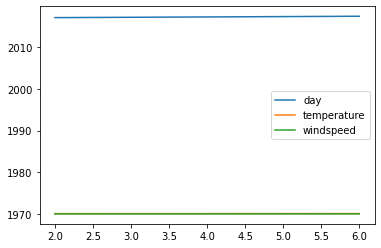

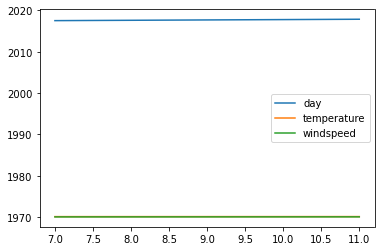

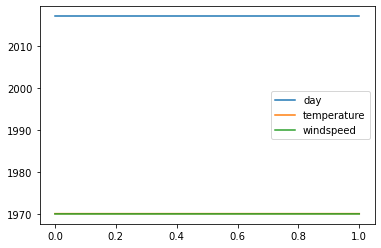

In [40]:
%matplotlib inline
g.plot()